<div class="alert alert-block alert-success">
<b> Comentário geral do revisor</b> <a class="tocSkip"></a>

Obrigado por enviar o seu projeto e fazer os ajustes sugeridos. Essa versão do seu trabalho ficou muito melhor! Espero que as sugestões sejam relevantes para projetos futuros.
    
<br>
Te desejo uma jornada de muito sucesso e aprendizado.
    
<br>   
    
Qualquer dúvida, pode contar comigo.   
    
<br>  
    
**Até breve!**

</div>

In [22]:
import os
import numpy as np
import pandas as pd
from typing import Tuple, Dict
from sklearn.model_selection import train_test_split, StratifiedKFold, GridSearchCV, RandomizedSearchCV
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.metrics import f1_score, roc_auc_score, classification_report, confusion_matrix, precision_recall_curve
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import precision_recall_curve
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import seaborn as sns


In [2]:
df_0 = pd.read_csv('geo_data_0.csv')
df_1 = pd.read_csv('geo_data_1.csv')
df_2 = pd.read_csv('geo_data_2.csv')





In [3]:
print(df_0)

          id        f0        f1        f2     product
0      txEyH  0.705745 -0.497823  1.221170  105.280062
1      2acmU  1.334711 -0.340164  4.365080   73.037750
2      409Wp  1.022732  0.151990  1.419926   85.265647
3      iJLyR -0.032172  0.139033  2.978566  168.620776
4      Xdl7t  1.988431  0.155413  4.751769  154.036647
...      ...       ...       ...       ...         ...
99995  DLsed  0.971957  0.370953  6.075346  110.744026
99996  QKivN  1.392429 -0.382606  1.273912  122.346843
99997  3rnvd  1.029585  0.018787 -1.348308   64.375443
99998  7kl59  0.998163 -0.528582  1.583869   74.040764
99999  1CWhH  1.764754 -0.266417  5.722849  149.633246

[100000 rows x 5 columns]


In [4]:
print(df_1)

          id         f0         f1        f2     product
0      kBEdx -15.001348  -8.276000 -0.005876    3.179103
1      62mP7  14.272088  -3.475083  0.999183   26.953261
2      vyE1P   6.263187  -5.948386  5.001160  134.766305
3      KcrkZ -13.081196 -11.506057  4.999415  137.945408
4      AHL4O  12.702195  -8.147433  5.004363  134.766305
...      ...        ...        ...       ...         ...
99995  QywKC   9.535637  -6.878139  1.998296   53.906522
99996  ptvty -10.160631 -12.558096  5.005581  137.945408
99997  09gWa  -7.378891  -3.084104  4.998651  137.945408
99998  rqwUm   0.665714  -6.152593  1.000146   30.132364
99999  relB0  -3.426139  -7.794274 -0.003299    3.179103

[100000 rows x 5 columns]


In [5]:
print(df_2)

          id        f0        f1        f2     product
0      fwXo0 -1.146987  0.963328 -0.828965   27.758673
1      WJtFt  0.262778  0.269839 -2.530187   56.069697
2      ovLUW  0.194587  0.289035 -5.586433   62.871910
3      q6cA6  2.236060 -0.553760  0.930038  114.572842
4      WPMUX -0.515993  1.716266  5.899011  149.600746
...      ...       ...       ...       ...         ...
99995  4GxBu -1.777037  1.125220  6.263374  172.327046
99996  YKFjq -1.261523 -0.894828  2.524545  138.748846
99997  tKPY3 -1.199934 -2.957637  5.219411  157.080080
99998  nmxp2 -2.419896  2.417221 -5.548444   51.795253
99999  V9kWn -2.551421 -2.025625  6.090891  102.775767

[100000 rows x 5 columns]


In [6]:


FEATURES = ["f0", "f1", "f2"]
TARGET = "product"

N_EXPLORE = 500   # poços explorados
N_SELECT = 200    #poços escolhidos
BUDGET = 100_000_000
REVENUE_PER_UNIT = 4500  # receita por mil barris
N_BOOT = 1000     #  bootstrap








Funçao para treinamento de modelo (linearRegression)

In [7]:

def treino_predict(df):

    X = df[FEATURES]
    y = df[TARGET]
    
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)
    
    model = LinearRegression()
    model.fit(X_train, y_train)
    
    y_pred = model.predict(X_test)
    rmse = mean_squared_error(y_test, y_pred, squared=False)

    valor_real = pd.DataFrame({'Real_value': y_test, 'Pred_value': y_pred})
    
    print(rmse)

    return valor_real 







In [8]:
predict_0 = treino_predict(df_0)

37.75660035026169


In [9]:
predict_1 = treino_predict(df_1)

0.890280100102884


In [10]:
predict_2 =  treino_predict(df_2)

40.145872311342174


<div class="alert alert-block alert-success">
<b> Comentário do revisor: </b> <a class="tocSkip"></a>

- O modelo foi treinado por região de operação
- Uma função foi implementada para organização do código
</div>

In [11]:
predict_0

,Real_value,Pred_value
75721,122.073350,101.901017
80184,48.738540,78.217774
19864,131.338088,115.266901
76699,88.327757,105.618618
92991,36.959266,97.980185
...,...,...
21271,148.821520,105.076959
34014,123.454003,74.768176
81355,91.945213,82.544397
65720,149.295563,81.826689


In [12]:
df_0['product'].mean()

92.50000000000001

In [13]:
df_1['product'].mean()

68.82500000000002

In [14]:
df_2['product'].mean()

95.00000000000004

In [ ]:
Acima a media do volume

Forneça conclusões sobre a etapa de preparação para o cálculo de lucro.

funçao que calcula o lucro

In [15]:
def calcular_top(df):
    maiores_results = df.sort_values('Pred_value', ascending=False).head(200)
    total_petro = maiores_results['Real_value'].sum()
    receita = total_petro * REVENUE_PER_UNIT
    lucro = receita - BUDGET
    return lucro
    



In [16]:
print(calcular_top(predict_0))


33591411.14462179


In [17]:

print(calcular_top(predict_1))




24150866.966815114


In [18]:
print(calcular_top(predict_2))

25985717.59374112


Lucro maior para a região 0

In [19]:
def df_bootstrap(df,n_select=200,n_boot=1000):
    values = []
    for i in range(n_boot):
        sample = df.sample(n=(500),replace=True)
        values.append(calcular_top(sample))

    values = np.array(values)
    lucro_medio = values.mean()
    intervalo = np.percentile(values, [2.5,97.5])
    risco = (values<0).mean()
     
    return lucro_medio,intervalo,risco   

        




    

In [20]:
for i,pred in enumerate([predict_0,predict_1,predict_2]):
    print(f'regiao{i}')
    lucro_medio,intervalo,risco = df_bootstrap(pred)
    print(f'lucro médio:',lucro_medio)
    print(f'intervalo',intervalo)
    print(f'risco:',risco)

regiao0
lucro médio: 4048136.9651720566
intervalo [-925593.58493291 8725003.04956848]
risco: 0.062
regiao1
lucro médio: 4384768.251133592
intervalo [ 502645.90287939 8630235.90071845]
risco: 0.014
regiao2
lucro médio: 3738285.7549642595
intervalo [-1373323.7509736   8930015.67781963]
risco: 0.069


Apresente suas conclusões: sugira uma região para o desenvolvimento de poços de petróleo e justifique sua escolha. A sua escolha corresponde à escolha anterior na etapa 4.3?

Não, o lucro maior foi para regiao 1

GRAFICOS:


Region 1 histograms




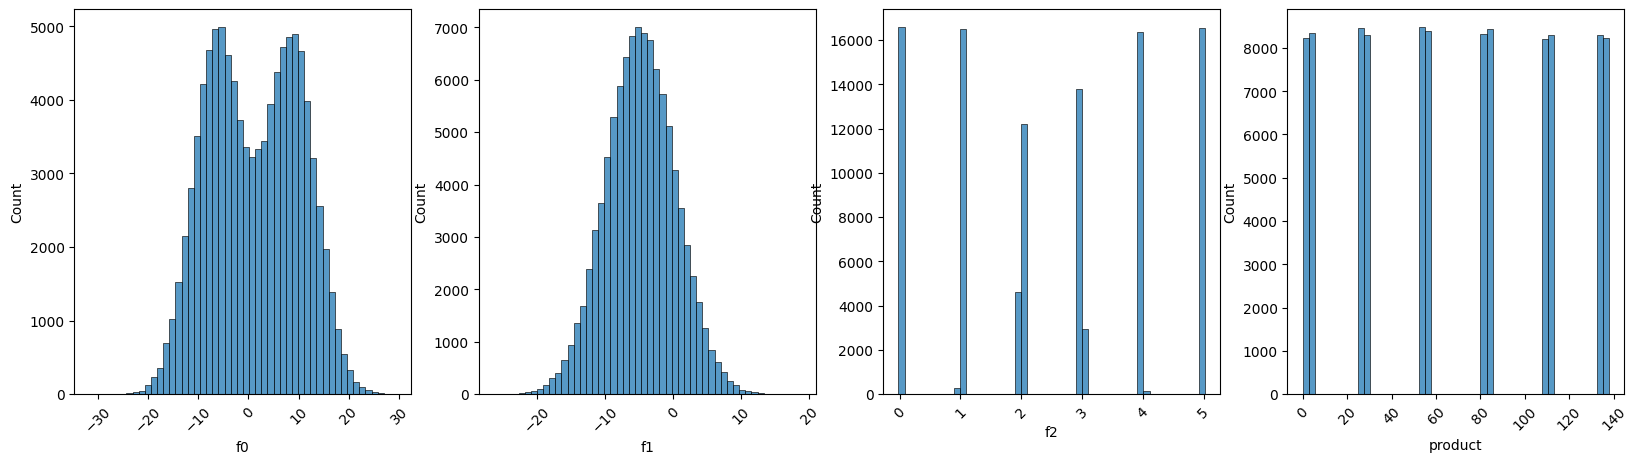

In [24]:

columns = ["f0","f1","f2","product"]
print('Region 0 histograms')
print()
print()
plt.subplots(figsize = (20,5))
for i,column in enumerate(columns):    
    grafico=sns.histplot(data=df_0, x=column, bins=50,ax=plt.subplot(1, len(columns), i + 1))
    plt.xticks(rotation = 45)  


Region 1 histograms




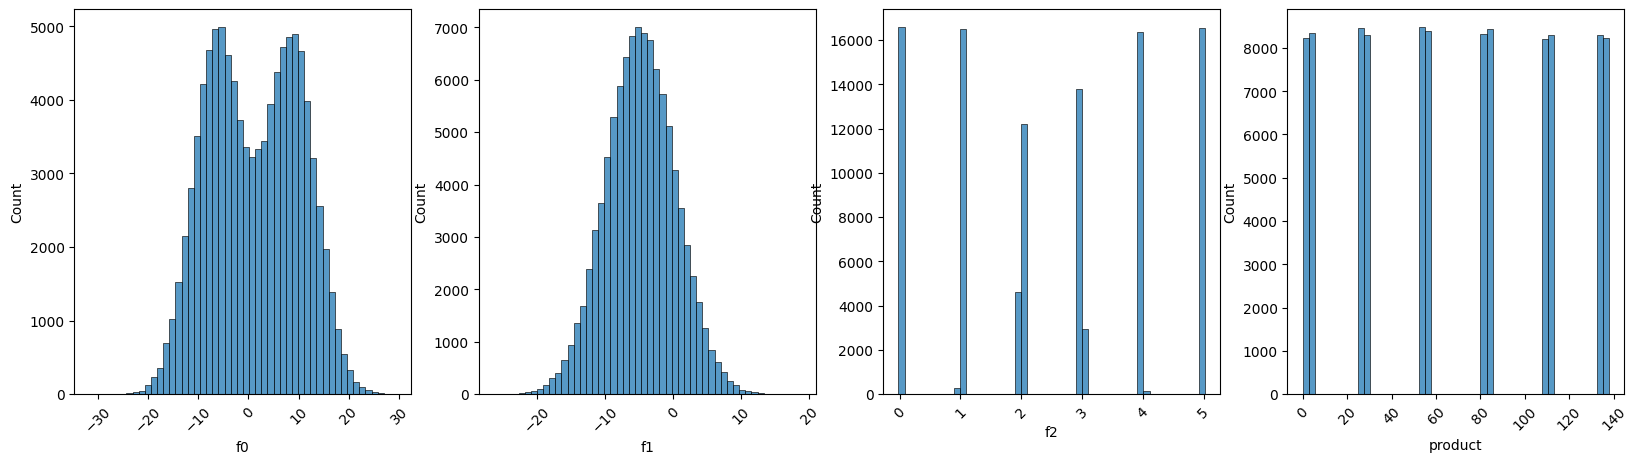

In [27]:
columns = ["f0","f1","f2","product"]
print('Region 1 histograms')
print()
print()
plt.subplots(figsize = (20,5))
for i,column in enumerate(columns):    
    grafico=sns.histplot(data=df_1, x=column, bins=50,ax=plt.subplot(1, len(columns), i + 1))
    plt.xticks(rotation = 45)  


Region 2 histograms




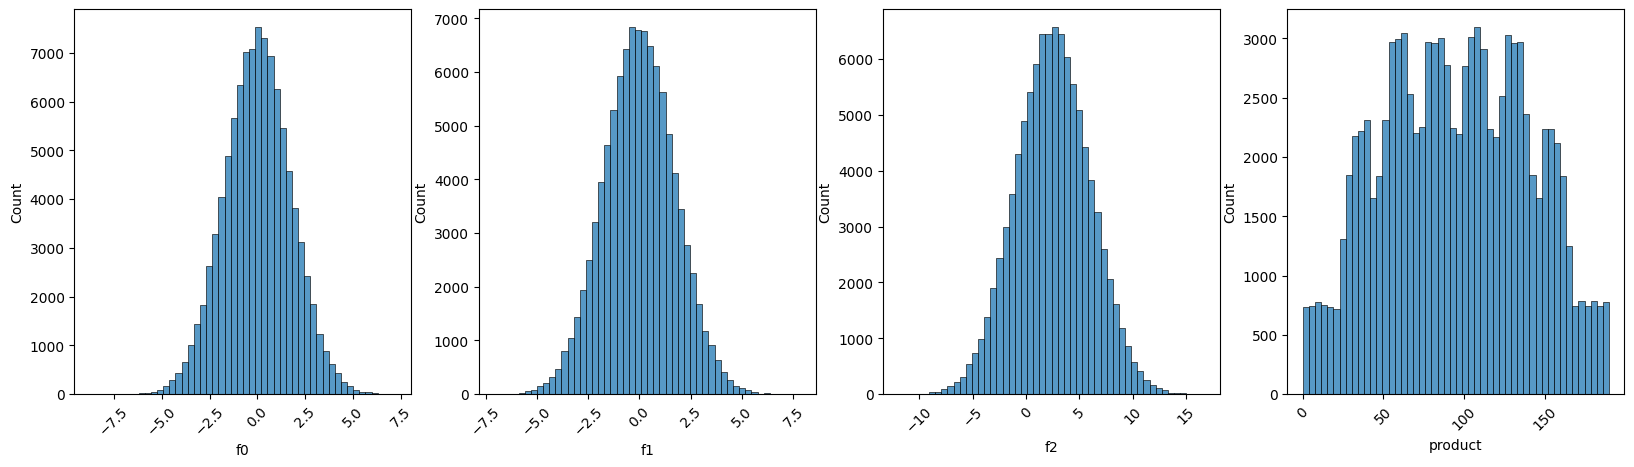

In [26]:
columns = ["f0","f1","f2","product"]
print('Region 2 histograms')
print()
print()
plt.subplots(figsize = (20,5))
for i,column in enumerate(columns):    
    grafico=sns.histplot(data=df_2, x=column, bins=50,ax=plt.subplot(1, len(columns), i + 1))
    plt.xticks(rotation = 45)  


<div class="alert alert-block alert-success">
<b> Comentário do revisor: </b> <a class="tocSkip"></a>

Bom trabalho com a análise exploratória acima!
</div>

In [29]:
def plot_curva(valor_real):
    plt.figure(figsize=(12,5))
    plt.plot(valor_real['Real_value'].values, label='Real', marker='o')
    plt.plot(valor_real['Pred_value'].values, label='Previsto', marker='x')
    plt.xlabel("Amostras")
    plt.ylabel("Valores")
    plt.title("Comparação Valores Reais vs Previstos")
    plt.legend()
    plt.grid(True)
    plt.show()


37.75660035026169


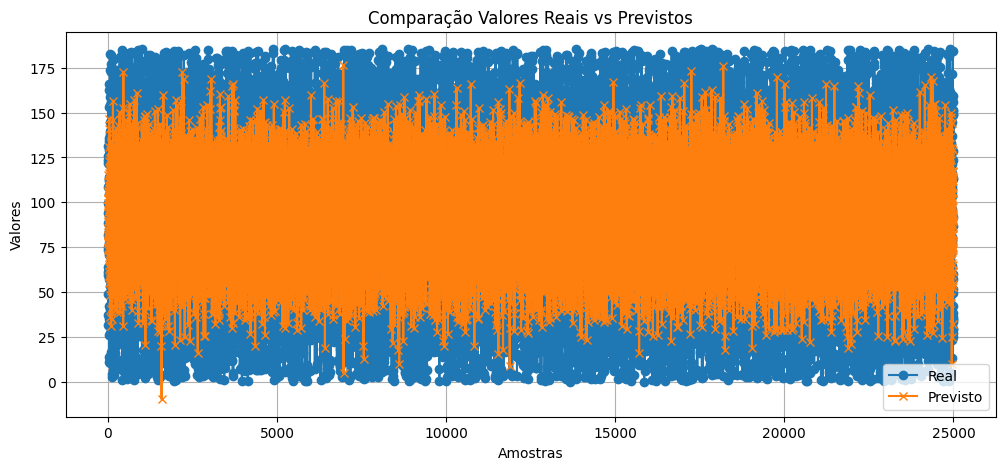

In [31]:
resultados = treino_predict(df_0)  
plot_curva(resultados)

0.890280100102884


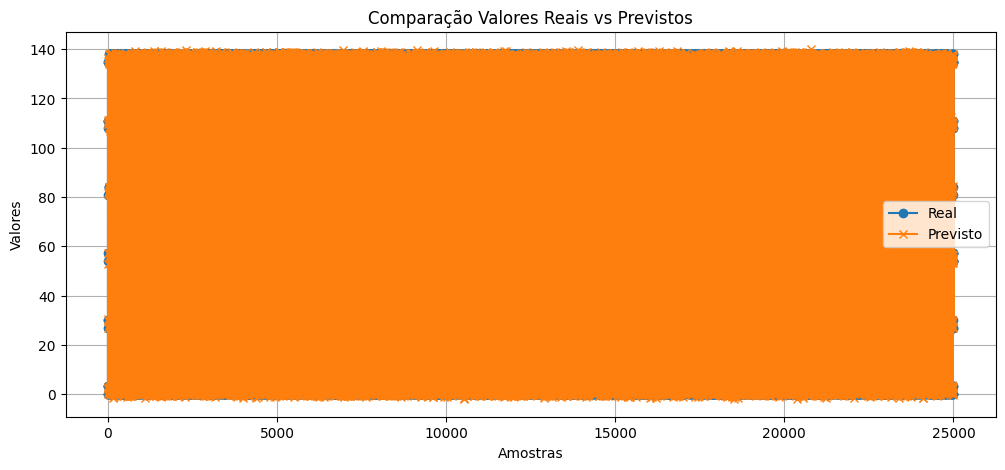

In [32]:
resultados = treino_predict(df_1)  
plot_curva(resultados)

40.145872311342174


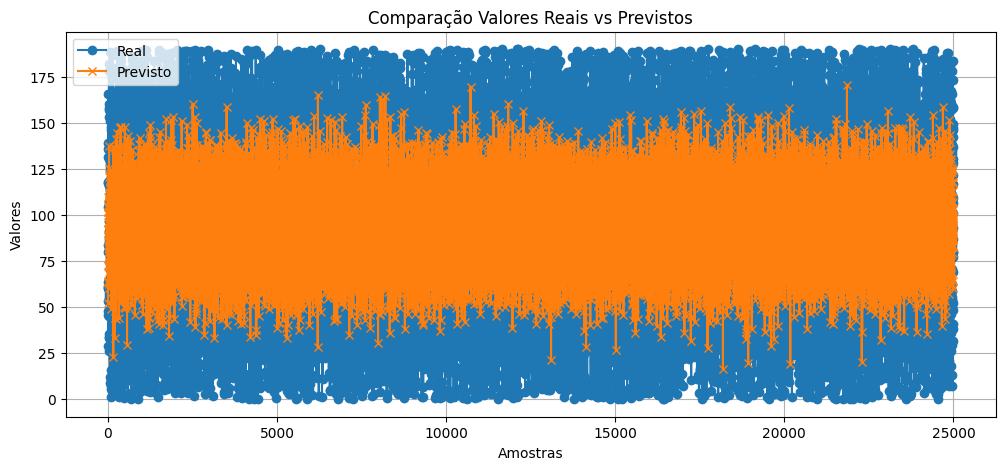

In [33]:
resultados = treino_predict(df_2)  
plot_curva(resultados)

acredito que o  modelo apresenta performance satisfatória, sendo capaz de prever com razoável precisão os valores da variável alvo.